<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          Derivatives in PyTorch</p>

In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt

We are creating a tensor <code>x</code> and setting a parameter <code>requires_grad</code> is True. It tells that we are going to take the derivative of tensor <code>x</code>.

In [3]:
x = torch.tensor(4.0, requires_grad=True)
print("The tensor x:", x)

The tensor x: tensor(4., requires_grad=True)


In [4]:
y = x ** 3
print("The value of y:", y)

The value of y: tensor(64., grad_fn=<PowBackward0>)


The derivative of $x^3$ with respect to x is: <br>
$\frac{d(x^3)}{dx} = 3 (x)^2$ <br>
$f(3)=3(4)^2$<br>
$f(3)= 3 * 16 = 48$

In [5]:
y.backward()
print("The derivative at x = 3:", x.grad)

The derivative at x = 3: tensor(48.)


<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Printing information about x and y:</p>

In [6]:
print("data\t\t:", x.data)
print("grad_fn\t\t:", x.grad_fn)
print("grad\t\t:", x.grad)
print("is_leaf\t\t:", x.is_leaf)
print("requires_grad\t:", x.requires_grad)

data		: tensor(4.)
grad_fn		: None
grad		: tensor(48.)
is_leaf		: True
requires_grad	: True


In [7]:
print("data\t\t:", y.data)
print("grad_fn\t\t:", y.grad_fn)
print("grad\t\t:", y.grad)
print("is_leaf\t\t:", y.is_leaf)
print("requires_grad\t:", y.requires_grad)

data		: tensor(64.)
grad_fn		: <PowBackward0 object at 0x000001B964666DD0>
grad		: None
is_leaf		: False
requires_grad	: True


C:\Users\madhubabukencha\AppData\Local\Temp\ipykernel_2384\4056273847.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:491.)
  print("grad\t\t:", y.grad)


<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Applying same thing on some complex equation:</p>

Finding the derivative for: $x^{2} + 2x + 5$ at x=2 <br>
$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$


In [8]:
x = torch.tensor(2.0, requires_grad=True)
y = (x**2) + 2 * x + 5
y.backward()
print("The derivative at x = 2:", x.grad)

The derivative at x = 2: tensor(6.)


<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Partial Derivatives:</p>

We will calculate paritial derivative for $f(u, v) = u * v + u^2$ where $u = 1, v = 2$

First we will calculate it by hand. For better understanding about multivariate paritial differentions read an artical called <a href="http://www.columbia.edu/itc/sipa/math/calc_rules_multivar.html">Rules of calculus - multivariate</a><br> <br>
Derivative with respective to u,<br>
$\frac{d f(u, v)}{du} = v * \frac{du}{du} + \frac{d(u^2)}{du}$ <br>
$\frac{d f(u, v)}{du} = v * 1 + 2 * u => v + 2u$<br>
when we substitute u and v values,<br>
$ => 2 + 2(1) => 4$ <br>
=================== <br>
Derivative with respective to v,<br>
$\frac{d f(u, v)}{dv} = u * \frac{dv}{dv} + \frac{d(u^2)}{dv}$ <br>
$\frac{d f(u, v)}{dv} = u * 1 + 0$, here $u$ treated as constant <br>
$\frac{d f(u, v)}{dv} = 1 * 1 => 1$

In [9]:
u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)
z = u * v + u**2
z.backward()

In [11]:
print("Derivative with respective u:", u.grad)
print("Derivative with respective v:", v.grad)

Derivative with respective u: tensor(4.)
Derivative with respective v: tensor(1.)


<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Getting derivatives for list of values:</p>

In [12]:
# derivative with multiple values
x = torch.linspace(-10, 10, 10, requires_grad=True)
Y = x ** 2
print("x:", x)
print("y:", Y)

x: tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True)
y: tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)


In [13]:
Y.detach().numpy()

array([100.       ,  60.493824 ,  30.864195 ,  11.111109 ,   1.2345669,
         1.2345669,  11.111109 ,  30.864195 ,  60.493824 , 100.       ],
      dtype=float32)

In [14]:
# This is the technique to get derivative for list of values
y = torch.sum(x**2)

In [15]:
y.backward()

In [16]:
x.grad.detach().numpy()

array([-20.       , -15.555555 , -11.111111 ,  -6.666666 ,  -2.2222214,
         2.2222214,   6.666666 ,  11.111111 ,  15.555555 ,  20.       ],
      dtype=float32)

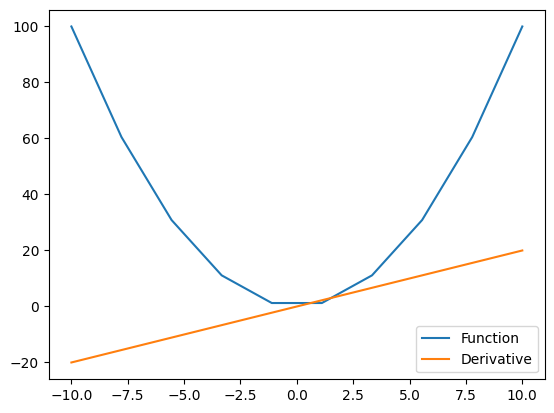

In [29]:
plt.plot(x.detach().numpy(), Y.detach().numpy(), label="Function")
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label="Derivative")
plt.legend()
plt.show()